Saksham Srivastava
<a href="mailto:sakshamsrivastava0000@gmail.com">Email</a>

In [1]:
import pandas as pd 
import numpy as np
import spacy 
from nltk.corpus import stopwords 

In [4]:
article_df = pd.read_excel('Assignment.xlsx')

In [5]:
article_df

,Article
0,"Retailers, the makers of foods marketed for we..."
1,"Move over, Ozempic — there’s a new drug in tow..."
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....
3,Austin Wolcott was 18 years old and pretty sur...
4,"Cancer, often referred to as the “emperor of a..."
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...
8,BRUKINSA is the first and only BTK inhibitor a...
9,Whether you're looking for a quick bite to eat...


In [6]:
article_df['id'] = article_df.index

In [9]:
def text_cleanup(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens) 

article_df['cleaned_text'] = article_df['Article'].apply(text_cleanup)

In [10]:
article_df

,Article,id,cleaned_text
0,"Retailers, the makers of foods marketed for we...",0,"Retailers , makers foods marketed weight loss ..."
1,"Move over, Ozempic — there’s a new drug in tow...",1,", Ozempic — new drug town . \n\n Eli Lilly Zep..."
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,2,Sept 14 ( Reuters ) - Bristol Myers Squibb ( B...
3,Austin Wolcott was 18 years old and pretty sur...,3,Austin Wolcott 18 years old pretty sure surviv...
4,"Cancer, often referred to as the “emperor of a...",4,"Cancer , referred “ emperor maladies , ” unyie..."
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,5,Nov 28 ( Reuters ) - U.S. Food Drug Administra...
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,6,Nov 21 ( Reuters ) - BeiGene ( 6160.HK ) said ...
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,7,Sept 19 ( Reuters ) - Drugmaker BeiGene ( 6160...
8,BRUKINSA is the first and only BTK inhibitor a...,8,BRUKINSA BTK inhibitor approved follicular lym...
9,Whether you're looking for a quick bite to eat...,9,"looking quick bite eat , sit - experience , qu..."


In [18]:
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def sentiment_analysis(text):
    doc = nlp(text)
    return doc._.polarity

article_df['sentiment'] = article_df['cleaned_text'].apply(sentiment_analysis)
article_df['sentiment'] = article_df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [19]:
article_df

,Article,id,cleaned_text,sentiment
0,"Retailers, the makers of foods marketed for we...",0,"Retailers , makers foods marketed weight loss ...",Positive
1,"Move over, Ozempic — there’s a new drug in tow...",1,", Ozempic — new drug town . \n\n Eli Lilly Zep...",Negative
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,2,Sept 14 ( Reuters ) - Bristol Myers Squibb ( B...,Positive
3,Austin Wolcott was 18 years old and pretty sur...,3,Austin Wolcott 18 years old pretty sure surviv...,Positive
4,"Cancer, often referred to as the “emperor of a...",4,"Cancer , referred “ emperor maladies , ” unyie...",Positive
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,5,Nov 28 ( Reuters ) - U.S. Food Drug Administra...,Positive
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,6,Nov 21 ( Reuters ) - BeiGene ( 6160.HK ) said ...,Positive
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,7,Sept 19 ( Reuters ) - Drugmaker BeiGene ( 6160...,Neutral
8,BRUKINSA is the first and only BTK inhibitor a...,8,BRUKINSA BTK inhibitor approved follicular lym...,Positive
9,Whether you're looking for a quick bite to eat...,9,"looking quick bite eat , sit - experience , qu...",Positive


In [20]:
sent1 = "Scientists develop a new solar panel that's more efficient than ever before. This could help us fight climate change!"
print(sentiment_analysis(sent1))

0.3806818181818182


In [21]:
#The example sentence has sentiment score of >0 which means it is positive.

In [23]:
#Use a pre-trained LLM to go through various articles and find a common theme among them.

from transformers import pipeline
nlp = pipeline("zero-shot-classification")

article_df['theme'] = article_df['cleaned_text'].apply(lambda x: nlp(x, candidate_labels=['Technology', 'Health', 'Science', 'Politics', 'Business', 'Sports'])['labels'][0])

2024-05-15 15:56:49.445552: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:56:49.895307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 15:56:49.895374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 15:56:49.896660: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 15:56:50.037244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

In [24]:
article_df

,Article,id,cleaned_text,sentiment,theme
0,"Retailers, the makers of foods marketed for we...",0,"Retailers , makers foods marketed weight loss ...",Positive,Business
1,"Move over, Ozempic — there’s a new drug in tow...",1,", Ozempic — new drug town . \n\n Eli Lilly Zep...",Negative,Health
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,2,Sept 14 ( Reuters ) - Bristol Myers Squibb ( B...,Positive,Health
3,Austin Wolcott was 18 years old and pretty sur...,3,Austin Wolcott 18 years old pretty sure surviv...,Positive,Business
4,"Cancer, often referred to as the “emperor of a...",4,"Cancer , referred “ emperor maladies , ” unyie...",Positive,Technology
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,5,Nov 28 ( Reuters ) - U.S. Food Drug Administra...,Positive,Health
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,6,Nov 21 ( Reuters ) - BeiGene ( 6160.HK ) said ...,Positive,Health
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,7,Sept 19 ( Reuters ) - Drugmaker BeiGene ( 6160...,Neutral,Health
8,BRUKINSA is the first and only BTK inhibitor a...,8,BRUKINSA BTK inhibitor approved follicular lym...,Positive,Science
9,Whether you're looking for a quick bite to eat...,9,"looking quick bite eat , sit - experience , qu...",Positive,Business


This was the first attempt and what was asked in the assignment, below is an alternative idea and some changes

In [25]:
df2 = pd.read_excel('Assignment.xlsx')

In [29]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Assuming df2 is your DataFrame and it has a column named 'Article'
stopWords = set(stopwords.words('english'))

def remove_stop(article):
    cleaned_sentences = []
    sentences = sent_tokenize(article)
    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [w for w in words if w.lower() not in stopWords]
        cleaned_sentences.append(' '.join(filtered_words))
    return ' '.join(cleaned_sentences)

df2["Cleaned"] = df2["Article"].apply(remove_stop)

In [30]:
df2

,Article,Cleaned
0,"Retailers, the makers of foods marketed for we...","Retailers , makers foods marketed weight loss ..."
1,"Move over, Ozempic — there’s a new drug in tow...","Move , Ozempic — ’ new drug town . Eli Lilly ’..."
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,Sept 14 ( Reuters ) - Bristol Myers Squibb ( B...
3,Austin Wolcott was 18 years old and pretty sur...,Austin Wolcott 18 years old pretty sure ’ surv...
4,"Cancer, often referred to as the “emperor of a...","Cancer , often referred “ emperor maladies , ”..."
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,Nov 28 ( Reuters ) - U.S. Food Drug Administra...
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,Nov 21 ( Reuters ) - BeiGene ( 6160.HK ) said ...
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,Sept 19 ( Reuters ) - Drugmaker BeiGene ( 6160...
8,BRUKINSA is the first and only BTK inhibitor a...,BRUKINSA first BTK inhibitor approved follicul...
9,Whether you're looking for a quick bite to eat...,"Whether 're looking quick bite eat , sit-down ..."


NLTK stopwords don't remove too many stopwords, it still maintains the meaning of the sentence.
Spacy stopwords remove more stopwords and the sentence loses its meaning.

In [32]:
#We can use the spaCy sentiment analysis model to analyze the sentiment of the articles.(again)

from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def sentiment_analysis(text):
    doc = nlp(text)
    return doc._.polarity

df2['Sentiment'] = df2['Cleaned'].apply(sentiment_analysis)
df2['Sentiment'] = df2['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

[nltk_data] Downloading package punkt to /home/saksh-
[nltk_data]     robocop/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/saksh-
[nltk_data]     robocop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/saksh-
[nltk_data]     robocop/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0: 0.026*"nike" + 0.012*"firm" + 0.010*"cancer" + 0.009*"therapy" + 0.006*"product"
Topic 1: 0.021*"account" + 0.009*"brukinsa" + 0.009*"well" + 0.008*"patient" + 0.008*"fargo"
Topic 2: 0.006*"said" + 0.006*"nestle" + 0.005*"therapy" + 0.005*"company" + 0.005*"cell"
Topic 3: 0.013*"drug" + 0.010*"hour" + 0.009*"restaurant" + 0.007*"company" + 0.007*"weight"
Topic 4: 0.021*"taco" + 0.013*"bell" + 0.009*"company" + 0.008*"new" + 0.008*"fry"
                                              Article  \
0   Retailers, the makers of foods marketed for we...   
1   Move over, Ozempic — there’s a new drug in tow...   
2   Sept 14 (Reuters) - Bristol Myers Squibb (BMY....   
3   Austin Wolcott was 18 years old and pretty sur...   
4   Cancer, often referred to as the “emperor of a...   
5   Nov 28 (Reuters) - The U.S. Food and Drug Admi...   
6   Nov 21 (Reuters) - BeiGene (6160.HK) said on T...   
7   Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...   
8   BRUKINSA is the first and only BTK

/tmp/ipykernel_22553/4291952025.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


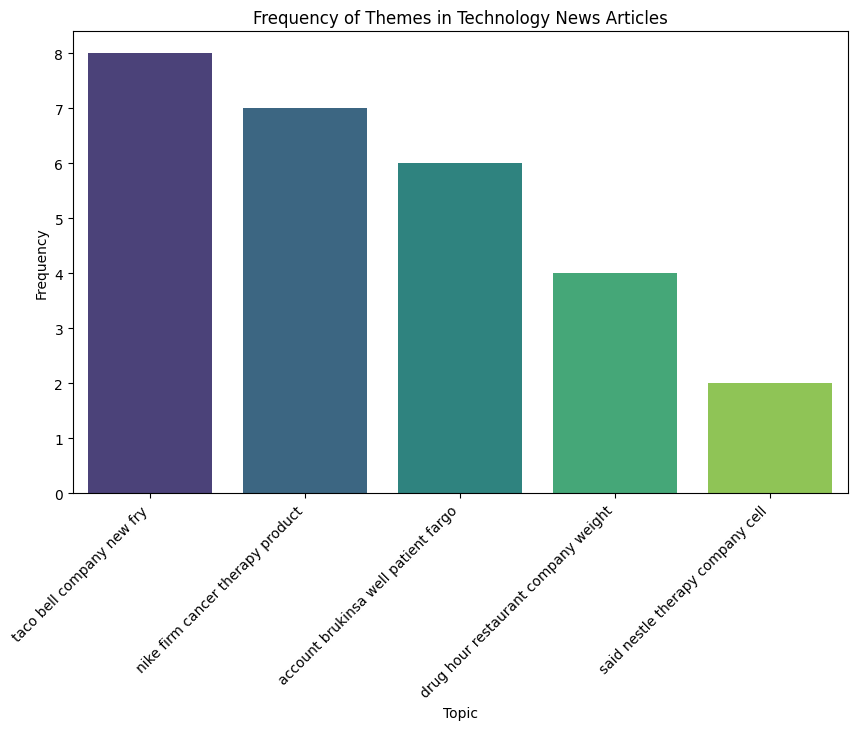

In [41]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary NLTK data files are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assume df2 is your DataFrame
df = df2.copy()

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['Cleaned'])

# Convert the documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in df['Cleaned']]

# Perform LDA
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract and print the topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

# Define a function to name the topics based on top words
def get_topic_names(lda_model, num_words=5):
    topic_names = {}

    for idx, topic in lda_model.show_topics(num_words=num_words, formatted=False):
        words = [word for word, _ in topic]
        if 'artificial' in words or 'intelligence' in words or 'machine' in words:
            topic_names[idx] = 'Advancements in AI'
        elif 'cybersecurity' in words or 'security' in words or 'breach' in words:
            topic_names[idx] = 'Cybersecurity Concerns'
        elif 'healthcare' in words or 'health' in words or 'treatment' in words:
            topic_names[idx] = 'Digital Transformation in Healthcare'
        elif 'financial' in words or 'market' in words or 'stock' in words:
            topic_names[idx] = 'Financial Market News'
        elif 'technology' in words or 'computing' in words or 'innovation' in words:
            topic_names[idx] = 'Tech Innovations'
        else:
            topic_names[idx] = ' '.join(words[:5])  # Join the top 5 words as the topic name

    return topic_names

# Get topic names
topic_names = get_topic_names(lda_model)

# Get the topic probabilities for each document
doc_topic_probs = [doc_topic_probs for doc_topic_probs in lda_model.get_document_topics(corpus)]

# Create a list to store the topics for each document
doc_topics = []

# Iterate over each document and its corresponding topic probabilities
for doc_probs in doc_topic_probs:
    doc_topics.append([topic_names[topic_id] for topic_id, prob in doc_probs if prob >= 0.1])  # Adjust the probability threshold as needed

# Add the list of topics to the DataFrame
df['Topics'] = doc_topics

# Check the assigned topics
print(df[['Article', 'Topics']])

# Count the frequency of each topic
topic_counts = []
for topics in df['Topics']:
    for topic in topics:
        topic_counts.append(topic)

topic_counts = pd.Series(topic_counts).value_counts()

# Plot the frequency of all themes
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Frequency of Themes in Technology News Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

# README
## !! IMPORTANT !!

# Text Analysis Project

This repository contains a Python script for performing text analysis on a dataset of news articles. The script utilizes various natural language processing (NLP) techniques and libraries to preprocess the text data, perform sentiment analysis, topic modeling, and visualize the results.

## Features

- **Text Preprocessing**: The script cleans the text data by removing stop words, lemmatizing words, and converting them to lowercase.
- **Sentiment Analysis**: The sentiment polarity of each article is calculated using the SpaCy TextBlob library, and the sentiment is categorized as positive, negative, or neutral.
- **Topic Modeling**: The Latent Dirichlet Allocation (LDA) algorithm from the Gensim library is used to identify topics present in the articles. The script provides a function to assign meaningful names to the topics based on the top words.
- **Topic Visualization**: The frequency of each identified topic across the articles is visualized using a bar chart created with Matplotlib and Seaborn.

## Requirements

To run the script, you need to have the following Python libraries installed:

- pandas
- numpy
- spacy
- nltk
- spacy-textblob
- transformers
- gensim
- matplotlib
- seaborn

You can install the required libraries using pip:

```
pip install pandas numpy spacy nltk spacy-textblob transformers gensim matplotlib seaborn
```

Additionally, you need to download the necessary NLTK data files by running the following commands within the script:

```python
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
```
## Example

The script includes an example usage where it analyzes a dataset of technology news articles. It performs sentiment analysis, topic modeling, and visualizes the frequency of identified topics.